In [1]:
import nbsetup as nb
import numpy as np
import ergodicpy as ep

from simulations.daisy_world.series import series

# Diversity

Diversity of a system is said to be a common feature of complexity. This is commonly measures of diversity within a system e.g. _e^H_ which measures the entropy of the diversity of say species within a system. So the more evenly spread the species populations, the higher the entropy, the higher this diversity measure.

Here we explore how _ergodic complexity_ can measure a complimentary measure of diversity to the one above. Instead of measuring the spread of say different species of tree within a forest, we can use the ergodic complexity to quantify difference in species present in different forests or the varying distributions of the same species across different forests or parts of the same forest.

## Daisyworld daises

To begin, we baseline daisyworld at the second peak with a standard population of black & white daises.

In [2]:
pop3 = {'white': {'albedo': 0.75, 'initial': 0.25}, 'black': {'albedo': 0.25, 'initial': 0.25}}
secondpeak = 0.8714285714285714

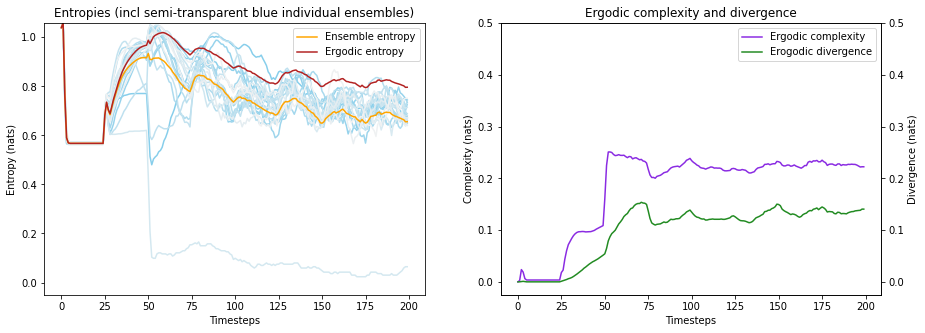

In [3]:
baseline = series(luminosity=secondpeak, population=pop3, cp=nb.cp)
x = baseline.plot()

### Increased populations

Instead of simple white and black daises, first we see what happens by introducing _n_ versions of black and white into the system.

In [4]:
def random_population(n=3, s=0.2, seed=None):
    np.random.seed(seed)
    species = {}
    for i in range(n):
        species['white %s' % i] = {'albedo': min(np.random.normal(0.75, s), 0.9), 'initial': 0.5/(n+1) }
        species['black %s' % i] = {'albedo': max(np.random.normal(0.25, s), 0.1), 'initial': 0.5/(n+1) }
    return species

In [9]:
pop_rand = random_population(seed=12345)
pop_rand

{'white 0': {'albedo': 0.7090584681030574, 'initial': 0.125},
 'black 0': {'albedo': 0.34578866761150967, 'initial': 0.125},
 'white 1': {'albedo': 0.6461122569886524, 'initial': 0.125},
 'black 1': {'albedo': 0.13885393913050198, 'initial': 0.125},
 'white 2': {'albedo': 0.9, 'initial': 0.125},
 'black 2': {'albedo': 0.5286811665945981, 'initial': 0.125}}

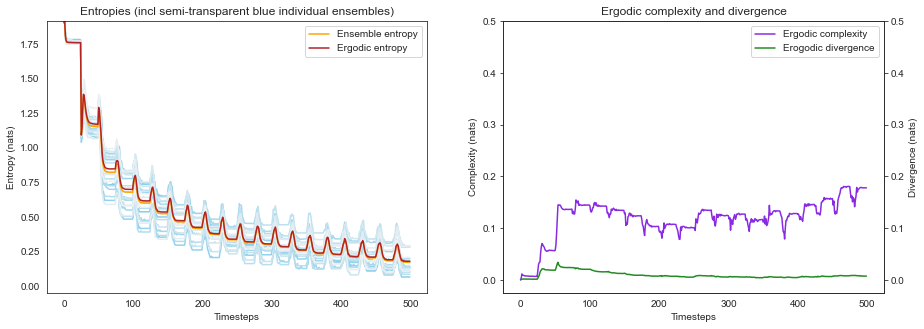

In [10]:
rand_static = series(luminosity=secondpeak, steps=500, population=pop_rand, cp=nb.cp)
x = rand_static.plot()

We can see this has a big effect on the complexity level of the system, as there are many more ways for the system to reach equilibrium.

the key corresponds to  {'empty': 0, 'white 0': 1, 'black 0': 2, 'white 1': 3, 'black 1': 4, 'white 2': 5, 'black 2': 6}


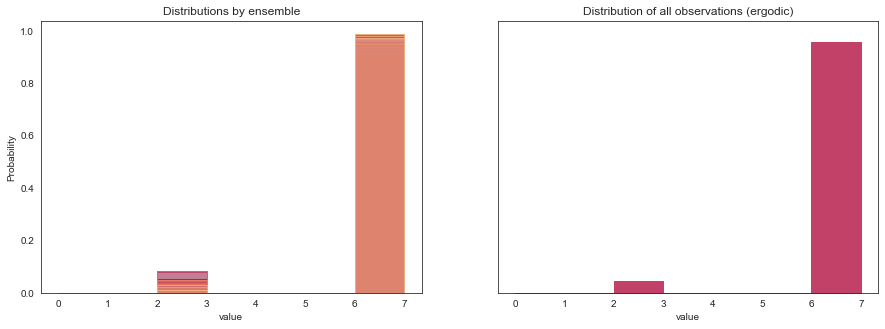

In [11]:
last_erg = rand_static.y[-1]
last_erg.plot()
print("the key corresponds to ", rand_static.models[0].legend)

## Mutation

Next we see how the system looks when we introduce mutation. Even though there are only a similar number of species across all ensembles, because those species are only present in some ensembles, only some ensembles have the ability to reach certain stable equilibrium points, meaning strictly their ergodic complexity is now much higher.

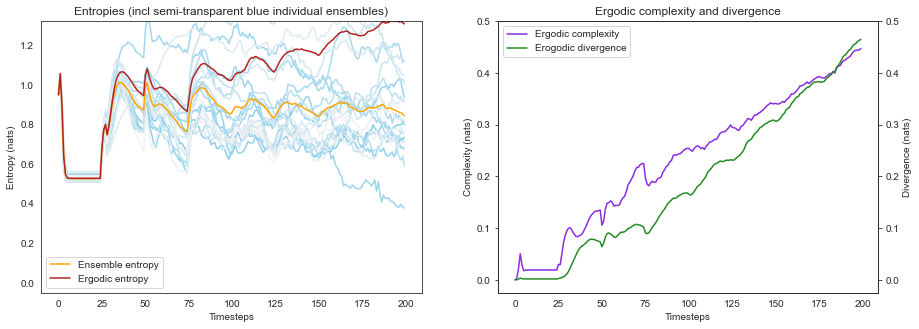

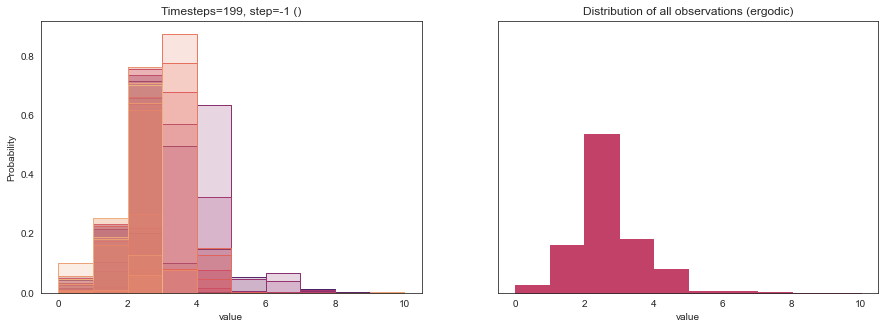

In [8]:
mutate = series(luminosity=secondpeak, mutate_p=0.0005, mutate_a=0.1, cp=nb.cp)
p = mutate.plot()
p = mutate.step_plot(-1)